# Yinghao Wang
## Final Project

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
import missingno as msno
import seaborn as sns

# supress filter warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1: Collect data for your project based on ticker symbols from the Russell 3000 index



## Upload ProjectTickers
The set of stocks will be provided in a CSV file with the list of ticker
symbols. It will be posted with Assignment #4 on QuestromTools
(“ProjectTickers.csv”).

In [2]:
data = pd.read_csv('/content/ProjectTickers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   Name    1886 non-null   object 
 2   RetYTD  1886 non-null   float64
dtypes: float64(1), object(2)
memory usage: 44.3+ KB


In [4]:
data.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


## Upload WRDS CRSP Stock Return Data
Collect monthly stock return data from January 2017 - December 2021 (60
months) for each of the stocks with tickers in the file “ProjectTickers.csv”.
The monthly stock returns can be downloaded from CRSP on the WRDS
database (see Assignment #3). Save these stock returns in a CSV file
labelled “Project-2017-21-Returns.csv”.

i. You will also use the “Fama-French” factor returns data from
Assignment #3.

In [5]:
# monthly stock return data from January 2017 - December 2021 (60 months)
stock_return = pd.read_csv('/content/Project-2017-21-Returns.csv')

In [6]:
# notice the RET is object type (meaning there are string values)
stock_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  114715 non-null  int64 
 1   date    114715 non-null  int64 
 2   TICKER  114653 non-null  object
 3   RET     114700 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


In [7]:
len(stock_return.TICKER.unique())

1925

In [8]:
# subset only rows with TICKER values in our projectticker unique values
# exclude null values
stock_return = stock_return.loc[stock_return['TICKER'].isin(data.Ticker)]
stock_return.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113160 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  113160 non-null  int64 
 1   date    113160 non-null  int64 
 2   TICKER  113160 non-null  object
 3   RET     113160 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.3+ MB


In [9]:
stock_return.loc[stock_return.RET == 'C']

,PERMNO,date,TICKER,RET
33195,16497,20170131,CNDT,C
33255,16498,20170131,HGV,C
33315,16499,20170131,PK,C
33555,16543,20170131,VREX,C
33675,16554,20170131,JELD,C
33795,16560,20170131,REVG,C
33855,16562,20170131,ANAB,C
33915,16570,20170131,JNCE,C
34813,18420,20190329,FOXA,C
35148,19283,20200430,ARNC,C


In [10]:
stock_return.loc[stock_return.RET == 'C'].shape

(11, 4)

Boxplot of non-string value of stock return for ticker symbol = CNDT:


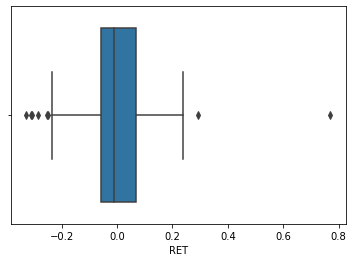

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = HGV:


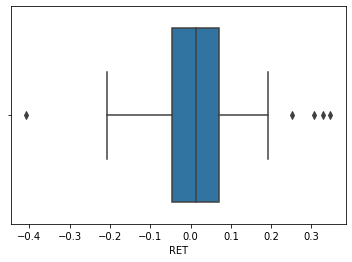

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = PK:


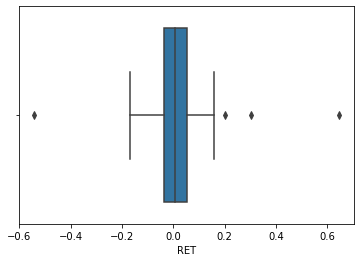

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = VREX:


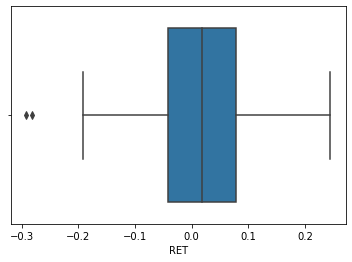

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = JELD:


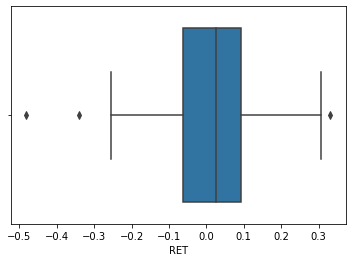

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = REVG:


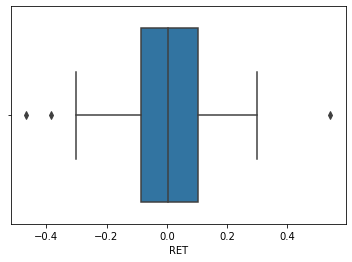

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = ANAB:


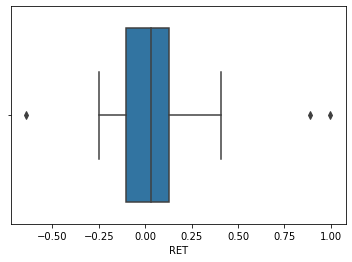

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = JNCE:


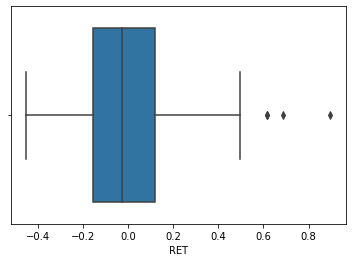

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = FOXA:


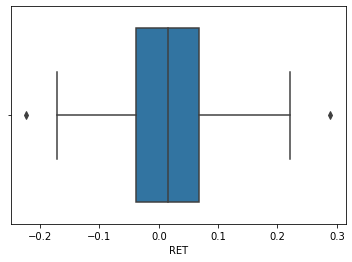

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = ARNC:


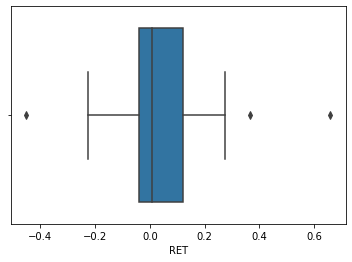

--------------------------------------------------
Boxplot of non-string value of stock return for ticker symbol = AAN:


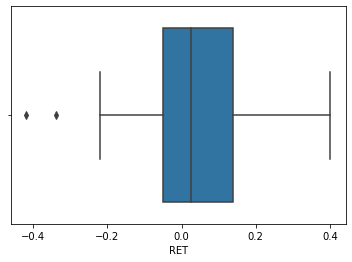

--------------------------------------------------


In [11]:
# generate boxplot of above 11 tickers' stock return
for i in stock_return.loc[stock_return.RET == 'C'].TICKER.unique():
  print('Boxplot of non-string value of stock return for ticker symbol = {}:'.format(i))
  temp = stock_return.loc[(stock_return.TICKER == i) & (stock_return.RET != 'C')]
  sns.boxplot(x=temp['RET'].astype('float'))
  plt.show()
  print('-'*50)

In [12]:
# replace 'C' string to nan
stock_return['RET'] = stock_return.RET.apply(lambda x: x if x != 'C' else np.nan)
# cast RET column to float type
stock_return.RET = pd.to_numeric(stock_return.RET)
# fill na with median
stock_return['RET'] = stock_return['RET'].fillna(stock_return.groupby('TICKER')['RET'].transform('median'))

In [13]:
stock_return.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113160 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  113160 non-null  int64  
 1   date    113160 non-null  int64  
 2   TICKER  113160 non-null  object 
 3   RET     113160 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.3+ MB


## Upload “Fama-French” factor returns Data

In [14]:
# “Fama-French” factor returns data
ff_factors = pd.read_csv('FF-Factors-2017-2021.csv')
ff_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dateff  60 non-null     int64  
 1   mktrf   60 non-null     float64
 2   smb     60 non-null     float64
 3   hml     60 non-null     float64
 4   rf      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


###Rename date column to "date" to match WRDS data "date" column

In [15]:
ff_factors.rename(columns={'dateff':'date'}, inplace=True)
ff_factors.head()

,date,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


## Upload Financial Report Data

Collect Financial Report data for the year 2021 for each of the stocks with
tickers in the file “ProjectTickers.csv”. The Financial Report data can be
downloaded from Compustat on the WRDS database (see Assignment #4).
Save these stock returns in a CSV file labelled “Project-2021-
Financials.csv”.

Financial Report Data Variables

> `act`: current assets  
`at`: total assets  
`cogs`: cost of goods sold  
`csho`: common shares outstanding  
`dt`: total debt   
`dvt`: dividends total    
`ebit`: earnings before interest and tax   
`ebitda`: earnings before interest  
`ib`: income before extradinary items  
`invt`: inventory  
`lct`: current liabilities  
`lt`: total liabilities  
`oancf`: operating activities net cash flow   
`optdr`:  divident rate (assumtption %)  
`ni`: net income  
`revt`: total revenue  
`sale`: net sale  
`seq`: stockholder's equity  
`tie`: interest expense total  
`prcc_c`: price closed annual  
`ceq`: common/ordinary equity

In [16]:
financial_report = pd.read_csv('/content/Project-2021- Financials.csv')
financial_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   act       1431 non-null   float64
 10  at        1886 non-null   float64
 11  ceq       1886 non-null   float64
 12  cogs      1886 non-null   float64
 13  csho      1886 non-null   float64
 14  dt        1649 non-null   float64
 15  dvp       1886 non-null   float64
 16  dvt       1877 non-null   float64
 17  ebit      1886 non-null   float64
 18  ebitda    1770 non-null   float64
 19  ib        1886 non-null   float64
 20  invt      1852 non-null   floa

## Upload Industry Identifier Data
Collect Industry Identifier data for the year 2021 for each of the stocks with
tickers in the file “ProjectTickers.csv”. The Industry data can be
downloaded from Compustat on the WRDS database (see Assignment #5).
Save these stock returns in a CSV file labelled “Project-2021-Sector.csv”.

In [17]:
industry_indentifier = pd.read_csv('/content/Project-2021-Sector.csv')
industry_indentifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gvkey     1886 non-null   int64 
 1   datadate  1886 non-null   int64 
 2   fyear     1886 non-null   int64 
 3   indfmt    1886 non-null   object
 4   consol    1886 non-null   object
 5   popsrc    1886 non-null   object
 6   datafmt   1886 non-null   object
 7   tic       1886 non-null   object
 8   curcd     1886 non-null   object
 9   costat    1886 non-null   object
 10  ggroup    1886 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 162.2+ KB


In [18]:
# fewer obs, will not use it 
industry_indentifier_fiscal = pd.read_csv('/content/ggroup_fiscal_year.csv')
industry_indentifier_fiscal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gvkey     1797 non-null   int64 
 1   datadate  1797 non-null   int64 
 2   fyear     1797 non-null   int64 
 3   indfmt    1797 non-null   object
 4   consol    1797 non-null   object
 5   popsrc    1797 non-null   object
 6   datafmt   1797 non-null   object
 7   tic       1797 non-null   object
 8   curcd     1797 non-null   object
 9   costat    1797 non-null   object
 10  ggroup    1797 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 154.6+ KB


# Step 2: Determine Risk Exposures
a. Similar to Assignment #3, calculate the Fama-French Risk Exposures for
the list of 3,000 tickers for (i) Market Risk Exposure; (ii) Size Risk
Exposure; and (iii) Value/Distress Risk Expsoure.

b. Save the ticker symbol and the 3 exposure values for each stock in the list
in a CSV file labelled “FF-Exposures.csv”.

## Estimate the Fama-French Risk Factor exposures by looping ticker names

Run OLS regression for all tickers (60 months) using FF 3-factor model
* [Ret(XOM)-Rf] = alpha + B1(RetMkt-Rf) + b2(SMB) + b3(HML) + e

In [19]:
# emtpy list initialization
# to store each model's parameter
cons = []
mktrf = []
smb = []
hml = []
rsq = []
adj_rsq = []

In [20]:
# two ways to do 
# output = pd.DataFrame()
for t in stock_return.TICKER.unique():

  # extract sub dataframe for ticker name == t
  temp = stock_return[stock_return.TICKER == t]
  # Merge the data sets for data with ticker name == t, and Fama-French market data based on "date"
  temp_ff = pd.merge(temp, ff_factors, on = 'date', how = 'outer')
  # temp_ff.dropna(inplace=True)
  
  # FF 3-factor regression
  y = temp_ff['RET'] - temp_ff['rf']
  X = temp_ff[['mktrf', 'smb', 'hml']]

  # use statsmodels
  X = sm.add_constant(X) # add constant
  model = sm.OLS(y, X).fit()
  # print(model.summary())


  # extract params 
  # constant 
  cons.append(model.params.const)
  # coef for mktrf
  mktrf.append(model.params.mktrf)
  # coef for smb
  smb.append(model.params.smb)
  # coef for hml
  hml.append(model.params.hml)

  # # append model parameters to dataframe
  # output = output.append({"TICKER": t,
  #                      "const": model.params.const,
  #                      "mktrf": model.params.mktrf,
  #                      "smb": model.params.smb,
  #                      "hml": model.params.hml}, ignore_index = True)

In [21]:
# construct dataframe
risk_exposure_output = pd.DataFrame({"TICKER": stock_return.TICKER.unique(),
                       "mktrf": mktrf,
                       "smb": smb,
                       "hml": hml})

In [22]:
risk_exposure_output['more volatility'] = np.where(risk_exposure_output.mktrf>1, True, False)
risk_exposure_output['small company'] = np.where(risk_exposure_output.smb>0, True, False)
risk_exposure_output['value stock'] = np.where(risk_exposure_output.hml>0, True, False)

In [23]:
risk_exposure_output

,TICKER,mktrf,smb,hml,more volatility,small company,value stock
0,JJSF,0.452887,0.356829,0.524302,False,True,True
1,PLXS,0.955657,0.229663,0.598402,False,True,True
2,ORCL,0.839476,-0.587083,0.016158,False,False,True
3,MSFT,0.935809,-0.330320,-0.401040,False,False,False
4,TROW,1.121489,0.008855,0.145466,True,True,True
...,...,...,...,...,...,...,...
1881,SIX,2.062411,1.129428,0.780178,True,True,True
1882,VPG,1.202745,0.953927,0.093573,True,True,True
1883,FN,0.697870,0.905014,0.087299,False,True,True
1884,CBOE,0.621143,-0.399150,0.339880,False,False,True


In [24]:
mktrf_temp = risk_exposure_output['more volatility'].value_counts().reset_index()
mktrf_temp

,index,more volatility
0,True,952
1,False,934


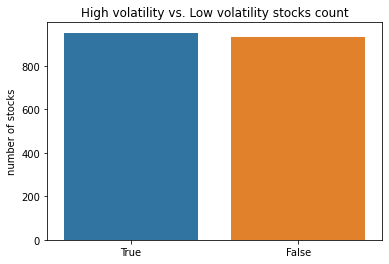

In [25]:
sns.barplot(data = mktrf_temp, x='index',y='more volatility', order = [True, False],)
plt.xlabel('')
plt.ylabel('number of stocks')
plt.title('High volatility vs. Low volatility stocks count')
plt.show()

count    1886.000000
mean        1.065369
std         0.624558
min        -6.676723
25%         0.720385
50%         1.006944
75%         1.337691
max         6.002016
Name: mktrf, dtype: float64


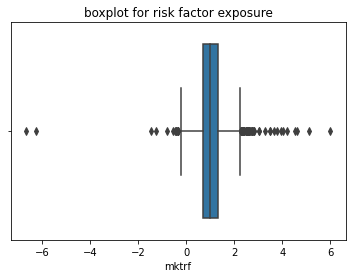

In [26]:
print(risk_exposure_output.mktrf.describe())
sns.boxplot(risk_exposure_output.mktrf)
plt.title('boxplot for risk factor exposure')
plt.show()

In [27]:
smb_temp = risk_exposure_output['small company'].value_counts().reset_index()
smb_temp

,index,small company
0,True,1430
1,False,456


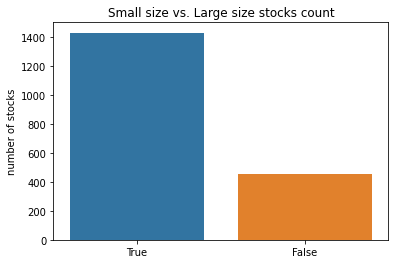

In [28]:
sns.barplot(data = smb_temp, x='index',y='small company', order = [True, False],)
plt.xlabel('')
plt.ylabel('number of stocks')
plt.title('Small size vs. Large size stocks count')
plt.show()

count    1886.000000
mean        0.667275
std         1.232195
min        -6.286219
25%         0.016011
50%         0.501588
75%         1.019407
max        31.005941
Name: smb, dtype: float64


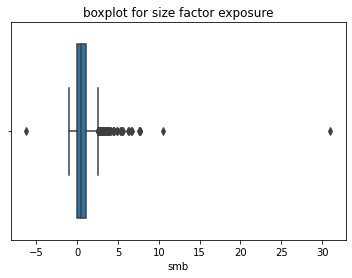

In [29]:
print(risk_exposure_output.smb.describe())
sns.boxplot(risk_exposure_output.smb)
plt.title('boxplot for size factor exposure')
plt.show()

In [30]:
hml_temp = risk_exposure_output['value stock'].value_counts().reset_index()
hml_temp

,index,value stock
0,True,1371
1,False,515


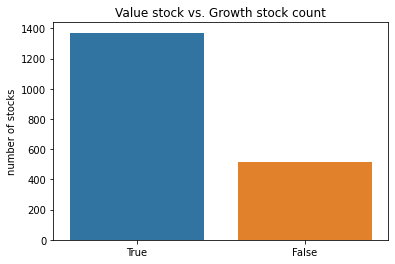

In [31]:
sns.barplot(data = hml_temp, x='index',y='value stock', order = [True, False],)
plt.xlabel('')
plt.ylabel('number of stocks')
plt.title('Value stock vs. Growth stock count')
plt.show()

count    1886.000000
mean        0.317248
std         0.699352
min        -3.593321
25%        -0.047773
50%         0.360752
75%         0.760726
max         5.919490
Name: hml, dtype: float64


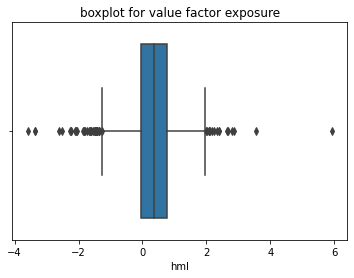

In [32]:
print(risk_exposure_output.hml.describe())
sns.boxplot(risk_exposure_output.hml)
plt.title('boxplot for value factor exposure')
plt.show()

## Risk Exposures Output

In [33]:
# print out output
risk_exposure_output = risk_exposure_output.iloc[:, :4]
risk_exposure_output

,TICKER,mktrf,smb,hml
0,JJSF,0.452887,0.356829,0.524302
1,PLXS,0.955657,0.229663,0.598402
2,ORCL,0.839476,-0.587083,0.016158
3,MSFT,0.935809,-0.330320,-0.401040
4,TROW,1.121489,0.008855,0.145466
...,...,...,...,...
1881,SIX,2.062411,1.129428,0.780178
1882,VPG,1.202745,0.953927,0.093573
1883,FN,0.697870,0.905014,0.087299
1884,CBOE,0.621143,-0.399150,0.339880


In [34]:
# save final outputs to csv file
risk_exposure_output.to_csv('FF-Exposures.csv')

# Step 3: Calculate Financial Ratios
a. Based on the Lectures in BA870, calculate relevant financial ratios
(including market ratios) that you believe might explain a company’s stock
return in early 2022.

b. You should calculate at least 10 ratios (including at least 2 market-based
ratios) to use in your analysis.

c. Use the methods from Assignment #4 to help you collect and calculate the
financial ratios.

d. Ensure that you correctly deal with missing values and outliers.

e. Calculate Save the ticker symbol and the 10+ financial ratios for each stock
in the list in a CSV file labelled “Fin-Ratios.csv”.

### Missing Value Imputation

Take a look at the dataset information and null value counts, we can observe that there are over 1,000 missing values in `optdr` and `tie` columns, over 400 missing values in `act` and `lct` columns. Therefore we should consider remove these variables because of the large portion of empty values. 

For other columns, there exist 237 missing values in `dt`, 116 missing values in `ebitda`, 34 missing values in `invt`, 9 missing values in `dvt`, and only one missing value in `oancf`. We decide to fill NAs with median of each variable because the data is extremely skewed and the outliers will have a significant on mean.


In [35]:
# missing value exists
financial_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   act       1431 non-null   float64
 10  at        1886 non-null   float64
 11  ceq       1886 non-null   float64
 12  cogs      1886 non-null   float64
 13  csho      1886 non-null   float64
 14  dt        1649 non-null   float64
 15  dvp       1886 non-null   float64
 16  dvt       1877 non-null   float64
 17  ebit      1886 non-null   float64
 18  ebitda    1770 non-null   float64
 19  ib        1886 non-null   float64
 20  invt      1852 non-null   floa

In [36]:
financial_report.isnull().sum()

gvkey          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
tic            0
curcd          0
act          455
at             0
ceq            0
cogs           0
csho           0
dt           237
dvp            0
dvt            9
ebit           0
ebitda       116
ib             0
invt          34
lct          455
lt             5
ni             0
oancf          1
optdr       1128
revt           0
sale           0
seq            0
tie         1711
costat         0
prcc_c         0
dtype: int64

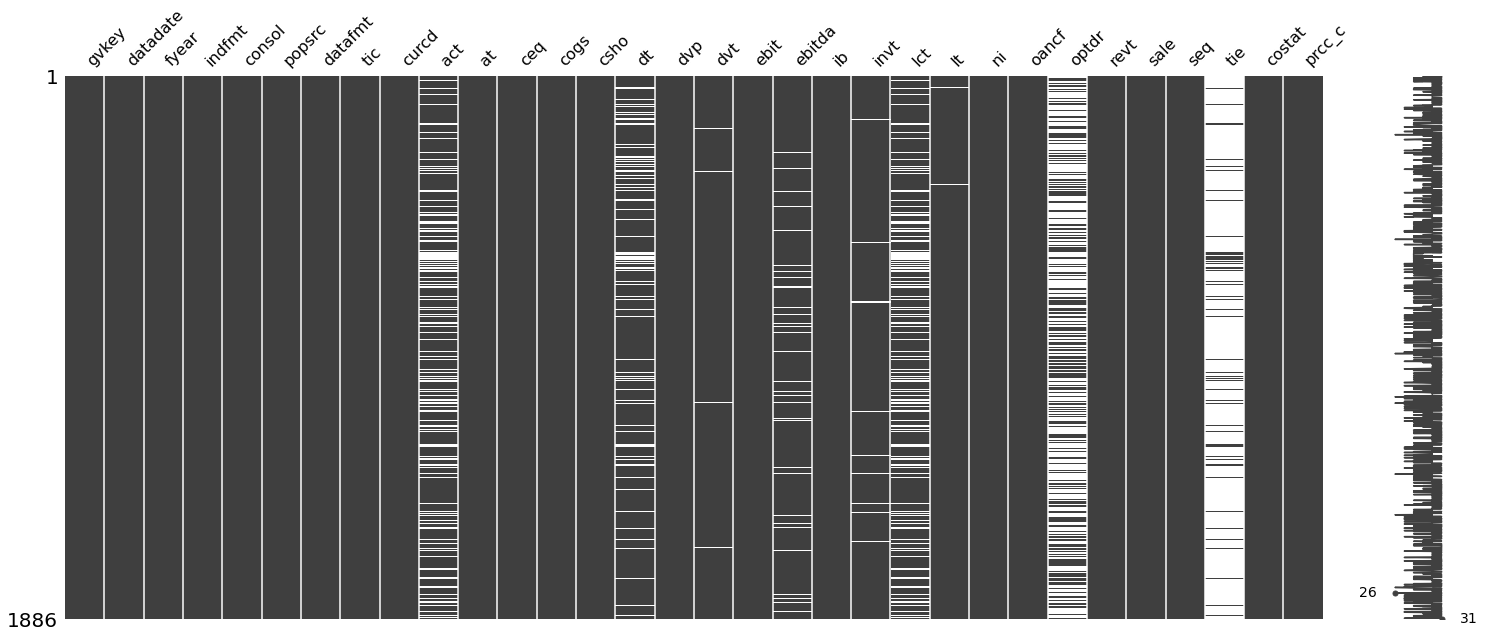

In [37]:
# visualizing missing value distribution in data 
msno.matrix(financial_report)

In [38]:
# drop variables with more than 200 missing values
financial_report.drop(columns = ['act','lct','tie','optdr','ebitda','dt'], inplace = True)
financial_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   at        1886 non-null   float64
 10  ceq       1886 non-null   float64
 11  cogs      1886 non-null   float64
 12  csho      1886 non-null   float64
 13  dvp       1886 non-null   float64
 14  dvt       1877 non-null   float64
 15  ebit      1886 non-null   float64
 16  ib        1886 non-null   float64
 17  invt      1852 non-null   float64
 18  lt        1881 non-null   float64
 19  ni        1886 non-null   float64
 20  oancf     1885 non-null   floa

In [39]:
financial_report.isnull().sum()

gvkey        0
datadate     0
fyear        0
indfmt       0
consol       0
popsrc       0
datafmt      0
tic          0
curcd        0
at           0
ceq          0
cogs         0
csho         0
dvp          0
dvt          9
ebit         0
ib           0
invt        34
lt           5
ni           0
oancf        1
revt         0
sale         0
seq          0
costat       0
prcc_c       0
dtype: int64

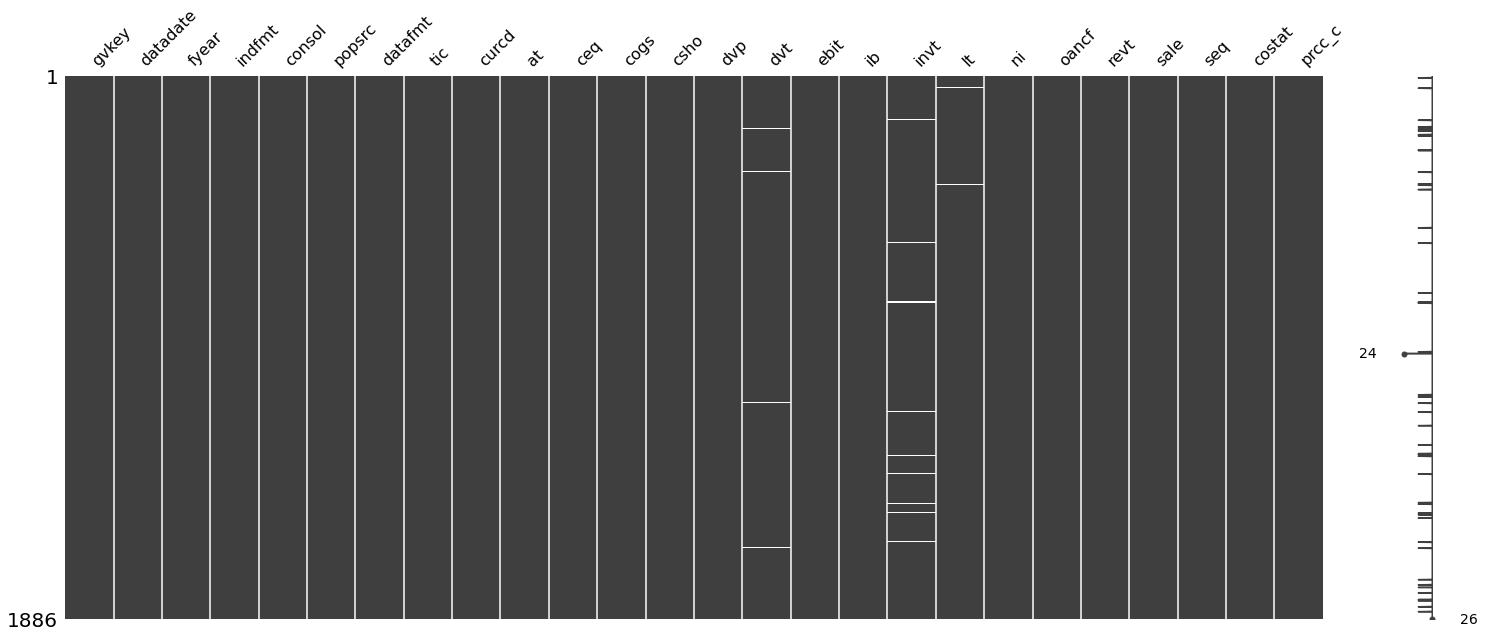

In [40]:
# visualizing missing value distribution in data 
msno.matrix(financial_report)

count    1.881000e+03
mean     2.095505e+04
std      1.357089e+05
min      1.609000e+00
25%      6.532430e+02
50%      2.578166e+03
75%      8.841488e+03
max      3.449440e+06
Name: lt, dtype: float64


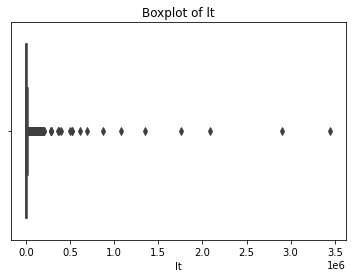

count      1852.000000
mean       1529.815522
std       17523.272480
min           0.000000
25%           0.000000
50%          60.042500
75%         437.975000
max      481195.000000
Name: invt, dtype: float64


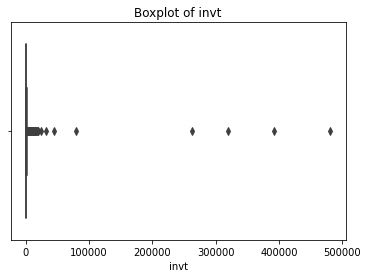

count      1885.000000
mean       1372.937724
std        5540.675045
min      -11525.000000
25%          58.318000
50%         229.153000
75%         805.869000
max      104038.000000
Name: oancf, dtype: float64


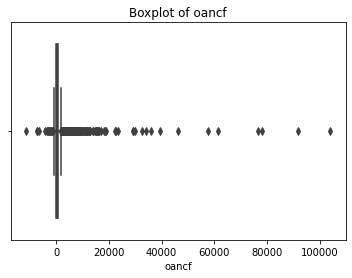

count     1877.000000
mean       297.817065
std       1091.948384
min         -0.128000
25%          0.000000
50%         19.000000
75%        128.483000
max      16871.000000
Name: dvt, dtype: float64


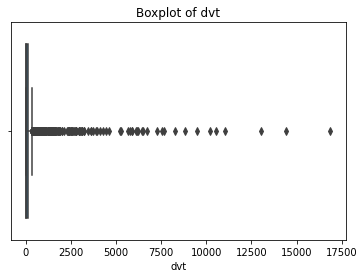

In [41]:
# we can observe extreme skewness in the boxplot below
for var in ['lt','invt','oancf','dvt']:
  print(financial_report[var].describe())
  sns.boxplot(x = financial_report[var])
  plt.title("Boxplot of "+var)
  plt.show()

In [42]:
# replace missing values with median because too many outliers exist
financial_report.fillna(financial_report.median(), inplace=True)
financial_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   at        1886 non-null   float64
 10  ceq       1886 non-null   float64
 11  cogs      1886 non-null   float64
 12  csho      1886 non-null   float64
 13  dvp       1886 non-null   float64
 14  dvt       1886 non-null   float64
 15  ebit      1886 non-null   float64
 16  ib        1886 non-null   float64
 17  invt      1886 non-null   float64
 18  lt        1886 non-null   float64
 19  ni        1886 non-null   float64
 20  oancf     1886 non-null   floa

### Adding Ratio Columns




> 
`at`: total assets  
`cogs`: cost of goods sold  
`csho`: common shares outstanding  
`dvt`: dividends total    
`ebit`: earnings before interest and tax   
`ib`: income before extradinary items  
`invt`: inventory  
`lt`: total liabilities  
`oancf`: operating activities net cash flow   
`ni`: net income  
`revt`: total revenue  
`sale`: net sale  
`seq`: stockholder's equity  
`prcc_c`: price closed annual  
`ceq`: common/ordinary equity

In [43]:
## Profitabibility Ratios
# return on assets
financial_report['ROA'] = financial_report['ebit']/financial_report['at']
# return on equity
financial_report['ROE'] = financial_report['ni']/financial_report['ceq']
# net profit margin
financial_report['Net Profit Margin'] = financial_report['ebit']/financial_report['at']

## Solvency ratios
# financial leverage
financial_report['Financial Leverage'] = financial_report['at'] / financial_report['ceq']

## Activity Ratios
# inventory turnover
invt_median = financial_report.invt.median()
financial_report.loc[financial_report.invt == 0, 'invt'] = invt_median
financial_report['Inventory Turnover'] = financial_report['cogs']/financial_report['invt']

In [44]:
## Valuation Ratios
financial_report['Dividend Payout Ratio'] = financial_report.dvt/financial_report.ib
financial_report['Dividend Yield'] = financial_report.dvt/(financial_report.prcc_c * financial_report.csho)

## Market Ratios
# Price/Book = (PRCC_C * CSHO ) / CEQ
financial_report['Price/Book'] = financial_report.prcc_c * financial_report.csho / financial_report.ceq
# P/E = (PRCC_C * CSHO ) / NI
financial_report['P/E'] = financial_report.prcc_c * financial_report.csho / financial_report.ni
# P/EBIT = (PRCC_C * CSHO ) / EBIT
financial_report['P/EBIT'] = financial_report.prcc_c * financial_report.csho / financial_report.ebit
# P/SALES = (PRCC_C * CSHO ) / SALE
financial_report['P/Sales'] = financial_report.prcc_c * financial_report.csho / financial_report.sale
# P/cash flow = PRCC_C * CSHO / Operating cash flow
financial_report['Price/Cash Flow'] = financial_report.prcc_c * financial_report.csho/financial_report.oancf

In [45]:
## take reciprocal of market value ratios for better performance

# to shrink the ratio range and eliminate inf results, 
# we take the reciprocal of market ratios
financial_report['B/P'] = 1/financial_report['Price/Book']
financial_report['E/P'] = 1/financial_report['P/E']
financial_report['EBIT/P'] = 1/financial_report['P/EBIT']
financial_report['S/P'] = 1/financial_report['P/Sales']
financial_report['CF/P'] = 1/financial_report['Price/Cash Flow']

financial_report['1/Financial Leverage'] = 1/financial_report['Financial Leverage']
financial_report['1/ROE'] = 1/financial_report['ROE']


# remove original ones
financial_report.drop(columns = ['Price/Book', 'P/E', 'P/EBIT','P/Sales', 'Price/Cash Flow', 'Financial Leverage', 'ROE'], inplace=True)

financial_report.fillna(financial_report.median(), inplace=True)
financial_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gvkey                  1886 non-null   int64  
 1   datadate               1886 non-null   int64  
 2   fyear                  1886 non-null   int64  
 3   indfmt                 1886 non-null   object 
 4   consol                 1886 non-null   object 
 5   popsrc                 1886 non-null   object 
 6   datafmt                1886 non-null   object 
 7   tic                    1886 non-null   object 
 8   curcd                  1886 non-null   object 
 9   at                     1886 non-null   float64
 10  ceq                    1886 non-null   float64
 11  cogs                   1886 non-null   float64
 12  csho                   1886 non-null   float64
 13  dvp                    1886 non-null   float64
 14  dvt                    1886 non-null   float64
 15  ebit

In [46]:
# extract ratio names
ratios = financial_report.columns[-12:]
ratios

Index(['ROA', 'Net Profit Margin', 'Inventory Turnover',
       'Dividend Payout Ratio', 'Dividend Yield', 'B/P', 'E/P', 'EBIT/P',
       'S/P', 'CF/P', '1/Financial Leverage', '1/ROE'],
      dtype='object')

In [47]:
financial_ratio_output = financial_report[['tic',
                                          'ROA', 'Net Profit Margin', 'Inventory Turnover',
       'Dividend Payout Ratio', 'Dividend Yield', 'B/P', 'E/P', 'EBIT/P',
       'S/P', 'CF/P', '1/Financial Leverage', '1/ROE'
       ]]
financial_ratio_output

,tic,ROA,Net Profit Margin,Inventory Turnover,Dividend Payout Ratio,Dividend Yield,B/P,E/P,EBIT/P,S/P,CF/P,1/Financial Leverage,1/ROE
0,AIR,0.042541,0.042541,2.308968,0.002160,0.000078,0.760488,0.027941,0.051121,1.288865,0.082105,0.632851,27.217877
1,AAL,-0.082958,-0.082958,15.581616,-0.000000,0.000000,-0.630953,-0.171320,-0.473988,2.568684,0.060516,-0.110431,3.682890
2,PNW,0.036600,0.036600,6.393957,0.612730,0.047558,0.740913,0.077616,0.101023,0.477178,0.107886,0.268424,9.545837
3,ABT,0.119235,0.119235,3.224161,0.457502,0.013030,0.144202,0.028480,0.036113,0.173496,0.042424,0.476116,5.063216
4,AMD,0.296159,0.296159,4.198977,0.000000,0.000000,0.043164,0.018205,0.021176,0.094618,0.020272,0.603672,2.370968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,KRG,0.004368,0.004368,5.088912,-0.715306,0.012121,0.822451,-0.016945,0.006998,0.078199,0.021044,0.513385,-48.536581
1882,LYB,0.201323,0.201323,7.378086,0.264601,0.048893,0.390154,0.184581,0.243378,1.519193,0.253182,0.322737,2.113725
1883,FRO,0.001996,0.001996,6.999876,-0.000000,0.000000,1.148753,-0.007747,0.005710,0.520778,0.043734,0.401500,-148.278974
1884,ALLE,0.175221,0.175221,4.162198,0.267081,0.011041,0.064973,0.041341,0.045758,0.245427,0.041820,0.248804,1.571636


In [48]:
financial_ratio_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tic                    1886 non-null   object 
 1   ROA                    1886 non-null   float64
 2   Net Profit Margin      1886 non-null   float64
 3   Inventory Turnover     1886 non-null   float64
 4   Dividend Payout Ratio  1886 non-null   float64
 5   Dividend Yield         1886 non-null   float64
 6   B/P                    1886 non-null   float64
 7   E/P                    1886 non-null   float64
 8   EBIT/P                 1886 non-null   float64
 9   S/P                    1886 non-null   float64
 10  CF/P                   1886 non-null   float64
 11  1/Financial Leverage   1886 non-null   float64
 12  1/ROE                  1886 non-null   float64
dtypes: float64(12), object(1)
memory usage: 191.7+ KB


## Check Outliers & Winsorize

In [49]:
ratios = financial_ratio_output.columns[1:]
ratios

Index(['ROA', 'Net Profit Margin', 'Inventory Turnover',
       'Dividend Payout Ratio', 'Dividend Yield', 'B/P', 'E/P', 'EBIT/P',
       'S/P', 'CF/P', '1/Financial Leverage', '1/ROE'],
      dtype='object')

Check Outliers for ROA:
count    1886.000000
mean        0.047180
std         0.157399
min        -1.420596
25%         0.018602
50%         0.053231
75%         0.106175
max         1.908472
Name: ROA, dtype: float64


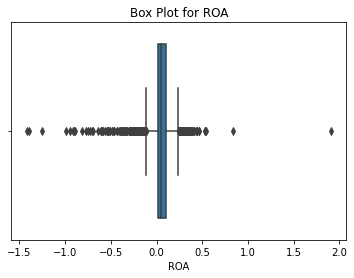

----------------------------------------
Check Outliers for Net Profit Margin:
count    1886.000000
mean        0.047180
std         0.157399
min        -1.420596
25%         0.018602
50%         0.053231
75%         0.106175
max         1.908472
Name: Net Profit Margin, dtype: float64


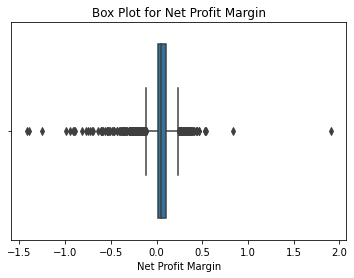

----------------------------------------
Check Outliers for Inventory Turnover:
count    1886.000000
mean       29.956576
std       135.304153
min       -46.714286
25%         2.435582
50%         5.088532
75%        13.972560
max      3629.845526
Name: Inventory Turnover, dtype: float64


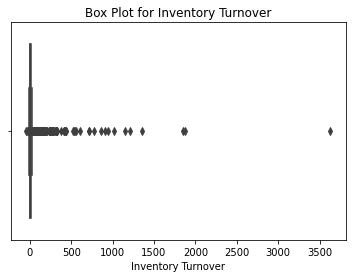

----------------------------------------
Check Outliers for Dividend Payout Ratio:
count    1886.000000
mean        0.371677
std         4.079297
min       -90.398959
25%         0.000000
50%         0.092851
75%         0.371872
max       118.595914
Name: Dividend Payout Ratio, dtype: float64


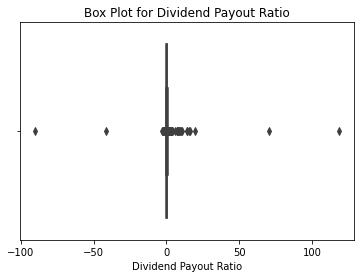

----------------------------------------
Check Outliers for Dividend Yield:
count    1886.000000
mean        0.015208
std         0.028262
min        -0.000013
25%         0.000000
50%         0.007126
75%         0.022818
max         0.738044
Name: Dividend Yield, dtype: float64


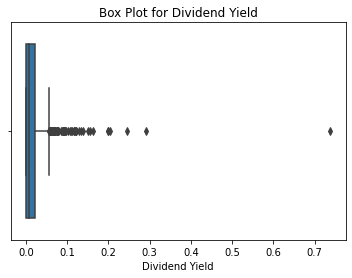

----------------------------------------
Check Outliers for B/P:
count    1886.000000
mean        0.422120
std         0.424100
min        -2.056645
25%         0.161112
50%         0.337004
75%         0.613868
max         7.547555
Name: B/P, dtype: float64


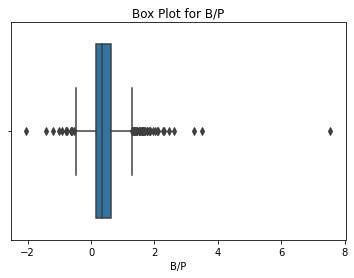

----------------------------------------
Check Outliers for E/P:
count    1886.000000
mean        0.027009
std         0.136353
min        -1.891725
25%         0.008113
50%         0.036704
75%         0.076322
max         0.898517
Name: E/P, dtype: float64


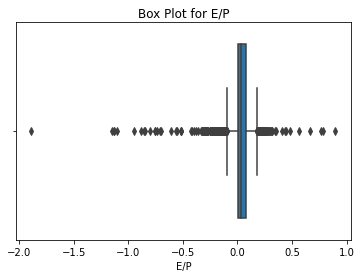

----------------------------------------
Check Outliers for EBIT/P:
count    1886.000000
mean        0.060538
std         0.130324
min        -1.334204
25%         0.019641
50%         0.056821
75%         0.113822
max         0.974888
Name: EBIT/P, dtype: float64


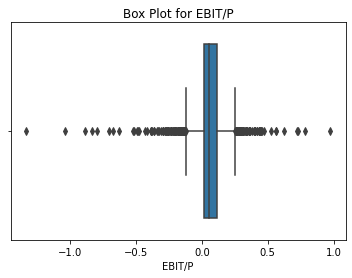

----------------------------------------
Check Outliers for S/P:
count    1886.000000
mean        0.765997
std         1.439881
min        -0.087004
25%         0.176223
50%         0.350729
75%         0.814565
max        27.543662
Name: S/P, dtype: float64


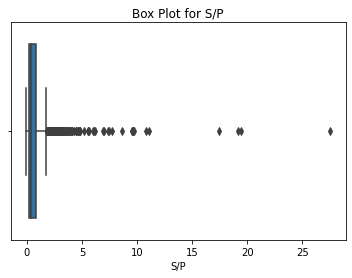

----------------------------------------
Check Outliers for CF/P:
count    1886.000000
mean        0.067981
std         0.141879
min        -1.714565
25%         0.026337
50%         0.059429
75%         0.110646
max         1.352590
Name: CF/P, dtype: float64


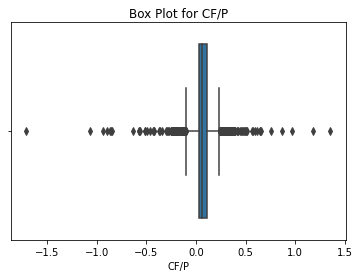

----------------------------------------
Check Outliers for 1/Financial Leverage:
count    1886.000000
mean        0.356933
std         0.274352
min        -2.517942
25%         0.181478
50%         0.355769
75%         0.530596
max         0.977871
Name: 1/Financial Leverage, dtype: float64


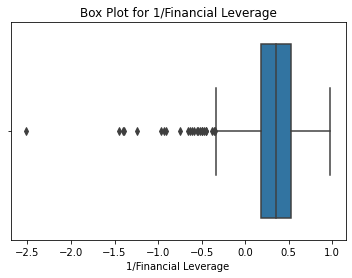

----------------------------------------
Check Outliers for 1/ROE:
count     1886.000000
mean        12.490073
std        318.402497
min      -1784.777228
25%          1.276991
50%          5.281984
75%          9.761295
max      13421.700730
Name: 1/ROE, dtype: float64


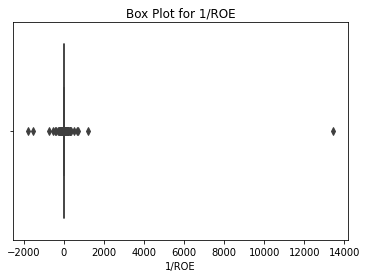

----------------------------------------


In [50]:
# loop for ratio names & check for outliers
for r in ratios:
  print('Check Outliers for {}:'.format(r))
  print(financial_report[r].describe())
  sns.boxplot(x = financial_report[r])
  plt.title('Box Plot for {}'.format(r))
  plt.show()
  print('-'*40)

Winsorizing Process for ROA Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.053772
std         0.094554
min        -0.200719
25%         0.018602
50%         0.053231
75%         0.106175
max         0.225946
Name: ROA, dtype: float64


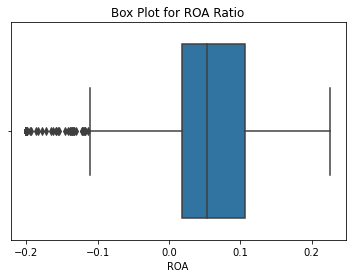

----------------------------------------
Winsorizing Process for Net Profit Margin Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.053772
std         0.094554
min        -0.200719
25%         0.018602
50%         0.053231
75%         0.106175
max         0.225946
Name: Net Profit Margin, dtype: float64


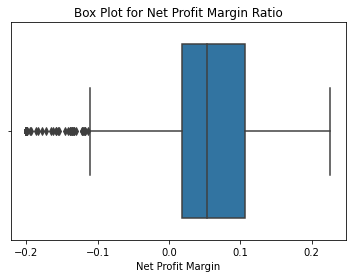

----------------------------------------
Winsorizing Process for Inventory Turnover Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean       16.814553
std        28.559431
min         0.121702
25%         2.435582
50%         5.088532
75%        13.972560
max       113.105706
Name: Inventory Turnover, dtype: float64


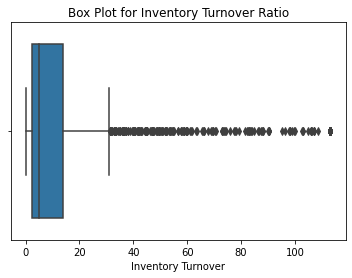

----------------------------------------
Winsorizing Process for Dividend Payout Ratio Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.258413
std         0.366588
min        -0.006417
25%         0.000000
50%         0.092851
75%         0.371872
max         1.315096
Name: Dividend Payout Ratio, dtype: float64


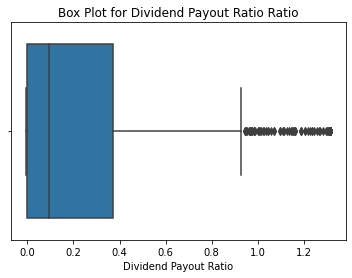

----------------------------------------
Winsorizing Process for Dividend Yield Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.013061
std         0.015313
min         0.000000
25%         0.000000
50%         0.007126
75%         0.022818
max         0.049804
Name: Dividend Yield, dtype: float64


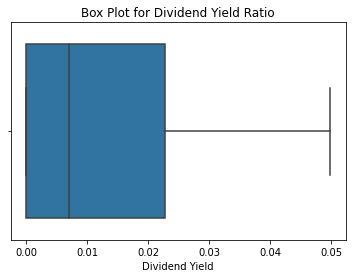

----------------------------------------
Winsorizing Process for B/P Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.411993
std         0.309511
min         0.010871
25%         0.161112
50%         0.337004
75%         0.613868
max         1.082827
Name: B/P, dtype: float64


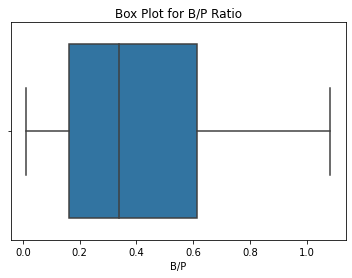

----------------------------------------
Winsorizing Process for E/P Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.033211
std         0.071839
min        -0.151546
25%         0.008113
50%         0.036704
75%         0.076322
max         0.157932
Name: E/P, dtype: float64


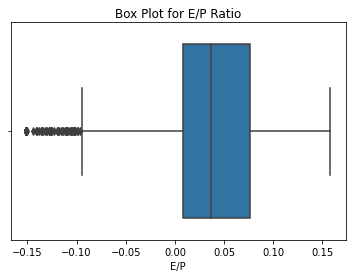

----------------------------------------
Winsorizing Process for EBIT/P Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.063356
std         0.082638
min        -0.117984
25%         0.019641
50%         0.056821
75%         0.113822
max         0.229450
Name: EBIT/P, dtype: float64


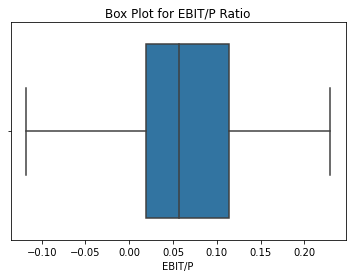

----------------------------------------
Winsorizing Process for S/P Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.641571
std         0.694656
min         0.052567
25%         0.176223
50%         0.350729
75%         0.814565
max         2.639594
Name: S/P, dtype: float64


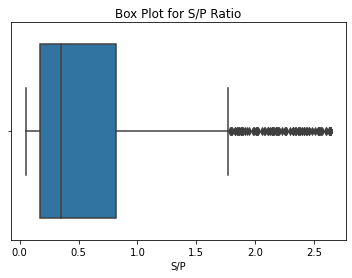

----------------------------------------
Winsorizing Process for CF/P Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.070967
std         0.082494
min        -0.092243
25%         0.026337
50%         0.059429
75%         0.110646
max         0.265490
Name: CF/P, dtype: float64


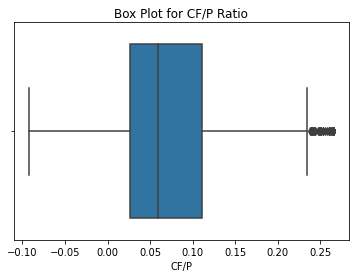

----------------------------------------
Winsorizing Process for 1/Financial Leverage Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        0.367976
std         0.220877
min         0.022096
25%         0.181478
50%         0.355769
75%         0.530596
max         0.786196
Name: 1/Financial Leverage, dtype: float64


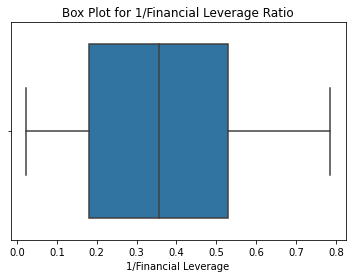

----------------------------------------
Winsorizing Process for 1/ROE Ratio at 5% and 99% level.
After Winsorizing, the stat results are:
count    1886.000000
mean        5.996010
std        10.291131
min       -15.193921
25%         1.276991
50%         5.281984
75%         9.761295
max        32.541667
Name: 1/ROE, dtype: float64


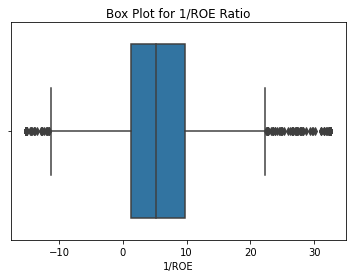

----------------------------------------


In [51]:
# loop for winsorizing
for r in ratios:
  print('Winsorizing Process for {} Ratio at 5% and 99% level.'.format(r))
  # winsorize at 5% and 95%
  financial_report[r] = winsorize(financial_report[r], (0.05, 0.05))
  print('After Winsorizing, the stat results are:')

  print(financial_report[r].describe())
  sns.boxplot(x = financial_report[r])
  plt.title('Box Plot for {} Ratio'.format(r))
  plt.show()
  print('-'*40)

## Financial Ratio Output

In [52]:
financial_ratio_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tic                    1886 non-null   object 
 1   ROA                    1886 non-null   float64
 2   Net Profit Margin      1886 non-null   float64
 3   Inventory Turnover     1886 non-null   float64
 4   Dividend Payout Ratio  1886 non-null   float64
 5   Dividend Yield         1886 non-null   float64
 6   B/P                    1886 non-null   float64
 7   E/P                    1886 non-null   float64
 8   EBIT/P                 1886 non-null   float64
 9   S/P                    1886 non-null   float64
 10  CF/P                   1886 non-null   float64
 11  1/Financial Leverage   1886 non-null   float64
 12  1/ROE                  1886 non-null   float64
dtypes: float64(12), object(1)
memory usage: 191.7+ KB


In [53]:
financial_ratio_output.head()

,tic,ROA,Net Profit Margin,Inventory Turnover,Dividend Payout Ratio,Dividend Yield,B/P,E/P,EBIT/P,S/P,CF/P,1/Financial Leverage,1/ROE
0,AIR,0.042541,0.042541,2.308968,0.002160,0.000078,0.760488,0.027941,0.051121,1.288865,0.082105,0.632851,27.217877
1,AAL,-0.082958,-0.082958,15.581616,-0.000000,0.000000,-0.630953,-0.171320,-0.473988,2.568684,0.060516,-0.110431,3.682890
2,PNW,0.036600,0.036600,6.393957,0.612730,0.047558,0.740913,0.077616,0.101023,0.477178,0.107886,0.268424,9.545837
3,ABT,0.119235,0.119235,3.224161,0.457502,0.013030,0.144202,0.028480,0.036113,0.173496,0.042424,0.476116,5.063216
4,AMD,0.296159,0.296159,4.198977,0.000000,0.000000,0.043164,0.018205,0.021176,0.094618,0.020272,0.603672,2.370968


In [54]:
# output to csv file
financial_ratio_output.to_csv('Fin-Ratios.csv')

# Step 4: Industry Indicators
a. Using the methods outlined in Assignment #5, determine industry indicators
for each stock in the list.

b. Save the ticker symbol and the industry indicators for each stock in the list
in a CSV file labelled “Industry.csv”.

## Create Industry Indicator 

In [55]:
# 24 unique industry categories value
print(industry_indentifier['ggroup'].unique())
print('There are {} unique Industry Indicators.'.format(len(industry_indentifier['ggroup'].unique())))

[2010 2030 5510 3510 4530 1510 6010 1010 2020 4030 4020 4510 3520 3010
 4520 3020 4010 5010 2550 2530 2520 3030 5020 2510]
There are 24 unique Industry Indicators.


In [56]:
group_value = ['Energy', #1010
               'Materials',
               'Capital Goods',
               'Professional Services',
               'Transportation', #2030
               'Automobiles & Components', #2510
               'Consumer Durables & Apparel', # 2520
               'Consumer Services', #2530
               'Retailing', #2550
               'Food & Staples Retailing', #3010
               'Food, Beverage & Tobacco', #3020
               'Household & Personal Products', #3030
               'Health Care Equipment & Services', #3510
               'Pharmaceuticals, Biotechnology & Life Sciences', #3520
               'Banks', #4010
               'Diversified Financials', #4020
               'Insurance', #4030
               'Software & Services', #4510
               'Technology Hardware & Equipment', #4520
               'Semiconductors & Semiconductor Equipment', #4530
               'Telecommunication Services', #5010
               'Media & Entertainment', #5020
               'Utilities', #5510
               'Real Estate' #6010

]
type(group_value)

list

In [57]:
temp = data.merge(industry_indentifier, left_on='Ticker', right_on = 'tic', how = 'inner')
industry_avg_stock_return = temp.groupby('ggroup').agg({'RetYTD': 'mean'})

In [58]:
industry_avg_stock_return.reset_index(inplace=True)
industry_avg_stock_return['Industry Group'] = group_value


In [59]:
industry_avg_stock_return.sort_values(by='RetYTD', ascending=False)

,ggroup,RetYTD,Industry Group
0,1010,0.515035,Energy
9,3010,0.078312,Food & Staples Retailing
1,1510,0.057846,Materials
22,5510,0.040759,Utilities
10,3020,0.038780,"Food, Beverage & Tobacco"
20,5010,0.011838,Telecommunication Services
16,4030,0.003779,Insurance
3,2020,-0.035157,Professional Services
23,6010,-0.035826,Real Estate
7,2530,-0.062583,Consumer Services


In [60]:
# entrie avg
temp.RetYTD.mean()

-0.06348361611876994

In [61]:
# check how many below entire avg
industry_avg_stock_return['below avg'] = np.where(industry_avg_stock_return.RetYTD < temp.RetYTD.mean(), True, False)
industry_avg_stock_return['below avg'].value_counts()

True     14
False    10
Name: below avg, dtype: int64

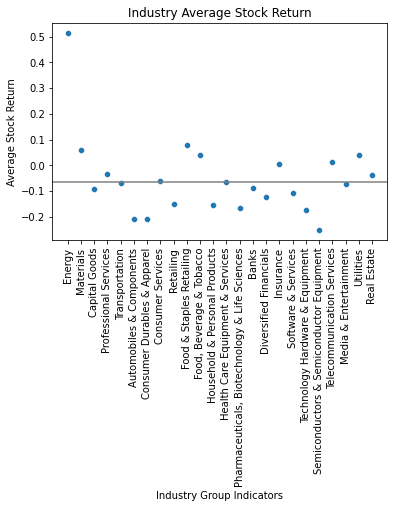

In [62]:

plt.xlabel('Industry Group Indicators')
plt.ylabel('Average Stock Return')
default_x_ticks = range(len(industry_avg_stock_return.ggroup.unique()))
sns.scatterplot(data=industry_avg_stock_return, x=default_x_ticks, y='RetYTD')
plt.axhline(y=temp.RetYTD.mean(), c='grey')
plt.xticks(default_x_ticks, group_value, rotation =90,)
plt.title('Industry Average Stock Return')
# plt.setp(plt.set_xticklabels(group_value))
plt.show()
# plt.xticks()

In [63]:
temp = data.merge(industry_indentifier, left_on='Ticker', right_on = 'tic', how = 'inner')
industry_count = temp.groupby('ggroup').agg({'ggroup': 'count'})
industry_count['Industry Group'] = group_value

In [64]:
industry_count.rename(columns = {'ggroup':'count'}, inplace=True)
industry_count.sort_values(by='count', ascending = False, inplace=True)
industry_count.reset_index(inplace=True)

In [65]:
# percentage of total
industry_count['perc %'] = round(industry_count['count'].astype('float')/1886 * 100, 2)

In [66]:
industry_count.sort_values(by='count', ascending = True, inplace=True)

In [67]:
industry_count

,ggroup,count,Industry Group,perc %
23,5010,13,Telecommunication Services,0.69
21,3030,17,Household & Personal Products,0.90
22,3010,17,Food & Staples Retailing,0.90
20,2510,25,Automobiles & Components,1.33
19,2030,39,Transportation,2.07
18,5020,42,Media & Entertainment,2.23
17,3020,44,"Food, Beverage & Tobacco",2.33
16,4530,55,Semiconductors & Semiconductor Equipment,2.92
15,5510,58,Utilities,3.08
14,4030,61,Insurance,3.23


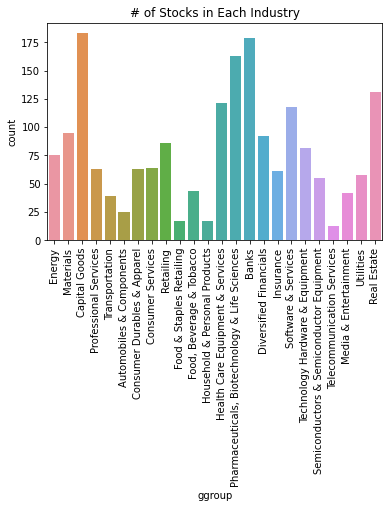

In [68]:

plt.xlabel('Industry Group Indicators')
plt.ylabel('Number of Stocks')
default_x_ticks = range(len(industry_avg_stock_return.ggroup.unique()))
sns.barplot(data= industry_count, x = 'ggroup', y = 'count',)
plt.xticks(default_x_ticks, group_value, rotation =90)
plt.title('# of Stocks in Each Industry')
plt.show()
# plt.xticks()

In [69]:
# create dummy vars
industry_indentifier = pd.get_dummies(industry_indentifier, columns=['ggroup'])
industry_indentifier.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,...,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,A,...,0,0,0,0,0,0,0,0,0,0
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,A,...,0,0,0,0,0,0,0,0,0,0
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,A,...,0,0,0,0,0,0,0,0,1,0
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,A,...,0,0,0,0,0,0,0,0,0,0
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,A,...,0,0,0,0,0,1,0,0,0,0


In [70]:
industry_indentifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gvkey        1886 non-null   int64 
 1   datadate     1886 non-null   int64 
 2   fyear        1886 non-null   int64 
 3   indfmt       1886 non-null   object
 4   consol       1886 non-null   object
 5   popsrc       1886 non-null   object
 6   datafmt      1886 non-null   object
 7   tic          1886 non-null   object
 8   curcd        1886 non-null   object
 9   costat       1886 non-null   object
 10  ggroup_1010  1886 non-null   uint8 
 11  ggroup_1510  1886 non-null   uint8 
 12  ggroup_2010  1886 non-null   uint8 
 13  ggroup_2020  1886 non-null   uint8 
 14  ggroup_2030  1886 non-null   uint8 
 15  ggroup_2510  1886 non-null   uint8 
 16  ggroup_2520  1886 non-null   uint8 
 17  ggroup_2530  1886 non-null   uint8 
 18  ggroup_2550  1886 non-null   uint8 
 19  ggroup_3010  1886 non-null 

## Industry Indicator Output

In [71]:
industry_indentifier.columns

Index(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'curcd', 'costat', 'ggroup_1010', 'ggroup_1510', 'ggroup_2010',
       'ggroup_2020', 'ggroup_2030', 'ggroup_2510', 'ggroup_2520',
       'ggroup_2530', 'ggroup_2550', 'ggroup_3010', 'ggroup_3020',
       'ggroup_3030', 'ggroup_3510', 'ggroup_3520', 'ggroup_4010',
       'ggroup_4020', 'ggroup_4030', 'ggroup_4510', 'ggroup_4520',
       'ggroup_4530', 'ggroup_5010', 'ggroup_5020', 'ggroup_5510',
       'ggroup_6010'],
      dtype='object')

In [72]:
# ticker symbol & industry indicators
industry_indicator_output = industry_indentifier[['tic', 
       'ggroup_1010', 'ggroup_1510', 'ggroup_2010',
       'ggroup_2020', 'ggroup_2030', 'ggroup_2510', 'ggroup_2520',
       'ggroup_2530', 'ggroup_2550', 'ggroup_3010', 'ggroup_3020',
       'ggroup_3030', 'ggroup_3510', 'ggroup_3520', 'ggroup_4010',
       'ggroup_4020', 'ggroup_4030', 'ggroup_4510', 'ggroup_4520',
       'ggroup_4530', 'ggroup_5010', 'ggroup_5020', 'ggroup_5510',
       'ggroup_6010']]

industry_indicator_output.head()

,tic,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,...,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,AIR,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AAL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PNW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ABT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AMD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
industry_indicator_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tic          1886 non-null   object
 1   ggroup_1010  1886 non-null   uint8 
 2   ggroup_1510  1886 non-null   uint8 
 3   ggroup_2010  1886 non-null   uint8 
 4   ggroup_2020  1886 non-null   uint8 
 5   ggroup_2030  1886 non-null   uint8 
 6   ggroup_2510  1886 non-null   uint8 
 7   ggroup_2520  1886 non-null   uint8 
 8   ggroup_2530  1886 non-null   uint8 
 9   ggroup_2550  1886 non-null   uint8 
 10  ggroup_3010  1886 non-null   uint8 
 11  ggroup_3020  1886 non-null   uint8 
 12  ggroup_3030  1886 non-null   uint8 
 13  ggroup_3510  1886 non-null   uint8 
 14  ggroup_3520  1886 non-null   uint8 
 15  ggroup_4010  1886 non-null   uint8 
 16  ggroup_4020  1886 non-null   uint8 
 17  ggroup_4030  1886 non-null   uint8 
 18  ggroup_4510  1886 non-null   uint8 
 19  ggroup_4520  1886 non-null 

In [74]:
# output to csv
industry_indicator_output.to_csv('Industry.csv')

# Step 5: Run OLS explanatory for 4 categories:

## a. Risk Regressions:
i. Ret(i) = a + b1*MktExposure(i) + b2*SizeExposure(i) +
b3*ValueExposure(i) + e

ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

### Merge Datasets

In [75]:
risk_regression_data = data.merge(risk_exposure_output, left_on='Ticker', right_on = 'TICKER', how = 'inner')

In [76]:
risk_regression_data.head()

,Ticker,Name,RetYTD,TICKER,mktrf,smb,hml
0,A,Agilent Technologies,-0.2080,A,1.014152,-0.253674,-0.143608
1,AA,Alcoa Corp,0.4731,AA,1.984149,0.527862,1.924844
2,AAL,American Airlines Gp,0.0579,AAL,1.315550,0.612825,1.248123
3,AAN,Aarons Holdings Company,-0.1327,AAN,1.643201,0.171044,0.833796
4,AAON,Aaon Inc,-0.3456,AAON,0.516779,0.422130,-0.117068


In [77]:
risk_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   Name    1886 non-null   object 
 2   RetYTD  1886 non-null   float64
 3   TICKER  1886 non-null   object 
 4   mktrf   1886 non-null   float64
 5   smb     1886 non-null   float64
 6   hml     1886 non-null   float64
dtypes: float64(4), object(3)
memory usage: 117.9+ KB


In [78]:
risk_regression_data.fillna(risk_regression_data.mean(), inplace=True)

### Regression Model


In [79]:
# split y and X
y = risk_regression_data.RetYTD
# X: mktrf, smb, hml
X = risk_regression_data.iloc[:, -3:]
# add constant
X = sm.add_constant(X)

In [80]:
risk_reg = sm.OLS(y, X).fit()
risk_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     65.51
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.73e-40
Time:                        01:37:17   Log-Likelihood:                 79.956
No. Observations:                1886   AIC:                            -151.9
Df Residuals:                    1882   BIC:                            -129.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0981      0.011     -8.783      0.000      -0.120      -0.076
mktrf          0.0082      0.009      0.957      0.339      -0.009       0.025
smb           -0.0120      0.004     -2.736      0.006      -0.021      -0.003
hml            0.1068      0.008     13.815      0.000       0.092       0.122
==============================================================================
Omnibus:                      642.181   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3599.682
Skew:                           1.492   Prob(JB):                         0.00
Kurtosis:                       9.074   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretations

With 3 risk exposure ratios (market, size, and value ones) as predictors for companies' stock return for early 2022 (January 2022 to April 2022), the r-squared of the regression model is only 0.095, with adjust r-squared as 0.093. 

These regression outputs indicate that risk exposure factors capture less than 10% of variance in stock return changes of early 2022, and the low correlation between our risk exposure ratios as features for the stock return prediction. The low explanatory power of three risk exposure factors can be caused by uncertainty caused by pandemic and intensity of political situations globally.

For the coefs of regression model, we can interpret as the following:
- market and value exposure of 2021 are positively correlated with stock return in early 2022, while the size exposure is negatively correlated with stock return.
- company with less volatility than the benchmark market index (<1) in 2021 tend to gain a high stock return in early 2022.
- company with larger size than the benchmark size index (<0) in 2021 tend to gain a high stock return in early 2022.
- company with a good valued stock (>0) in 2021 tend to gain a high stock return in early 2022.


Specifically:
- 1% increase of 2021's mktrf ratio which measures the systematic risk in relation to the market, willresult a 0.82% increase in early 2022's stock return,
- 1% unit increase of 2021's smb ratio will result a 1.20% decrease in early 2022's stock return,
- 1% unit increase of 2021's hml ratio will result a 10.68% increase in early 2022's stock return.

However, we can observe that the markert exposure risk ratio `mktrf` with p-value equals to 0.339 is not statistically significant for stock return prediction;  
while the size and value exposure ratio `smb` and `hml` are all with a p-value less than 0.05, and the coef value falls within the corresponding 95% CI range that does not contain 0, which illustrate a statistical significance of the two predictors.


## b. Financial Characteristics:
i. Ret(i) = a + c1*Ratio1(i) + c2*Ratio2(i) + … + c10*Ratio10 (i) + e

ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

### Merge Datasets

In [81]:
# merge datasets
fin_char_data = data.merge(financial_ratio_output, left_on='Ticker', right_on = 'tic', how = 'inner')
fin_char_data.head()

,Ticker,Name,RetYTD,tic,ROA,Net Profit Margin,Inventory Turnover,Dividend Payout Ratio,Dividend Yield,B/P,E/P,EBIT/P,S/P,CF/P,1/Financial Leverage,1/ROE
0,A,Agilent Technologies,-0.2080,A,0.131621,0.131621,3.219277,0.195041,0.004891,0.111695,0.025079,0.029204,0.130970,0.030779,0.503410,4.453719
1,AA,Alcoa Corp,0.4731,AA,0.138236,0.138236,4.679448,0.044289,0.001732,0.425940,0.039111,0.189357,1.107882,0.083875,0.310948,10.890443
2,AAL,American Airlines Gp,0.0579,AAL,-0.082958,-0.082958,15.581616,-0.000000,0.000000,-0.630953,-0.171320,-0.473988,2.568684,0.060516,-0.110431,3.682890
3,AAN,Aarons Holdings Company,-0.1327,AAN,0.109513,0.109513,1.627197,0.120700,0.017377,0.940491,0.143967,0.206699,2.416822,0.178154,0.498289,6.532701
4,AAON,Aaon Inc,-0.3456,AAON,0.113249,0.113249,2.714827,0.339477,0.004781,0.111730,0.014083,0.017648,0.128111,0.014664,0.716986,7.933728


In [82]:
fin_char_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ticker                 1886 non-null   object 
 1   Name                   1886 non-null   object 
 2   RetYTD                 1886 non-null   float64
 3   tic                    1886 non-null   object 
 4   ROA                    1886 non-null   float64
 5   Net Profit Margin      1886 non-null   float64
 6   Inventory Turnover     1886 non-null   float64
 7   Dividend Payout Ratio  1886 non-null   float64
 8   Dividend Yield         1886 non-null   float64
 9   B/P                    1886 non-null   float64
 10  E/P                    1886 non-null   float64
 11  EBIT/P                 1886 non-null   float64
 12  S/P                    1886 non-null   float64
 13  CF/P                   1886 non-null   float64
 14  1/Financial Leverage   1886 non-null   float64
 15  1/RO

### Regression Model

In [83]:
# split y and X
y = fin_char_data.RetYTD
# X: 11 financial ratios
X = fin_char_data.iloc[:, 4:]
# add constant
X = sm.add_constant(X)

In [84]:
fin_char_reg = sm.OLS(y, X).fit()
fin_char_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     18.16
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           7.78e-35
Time:                        01:37:17   Log-Likelihood:                 81.796
No. Observations:                1886   AIC:                            -139.6
Df Residuals:                    1874   BIC:                            -73.09
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1328      0.011    -11.599      0.000      -0.155      -0.110
ROA                       0.0650      0.022      2.994      0.003       0.022       0.107
Net Profit Margin         0.0650      0.022      2.994      0.003       0.022       0.107
Inventory Turnover     4.577e-05   3.97e-05      1.154      0.249    -3.2e-05       0.000
Dividend Payout Ratio     0.0001      0.002      0.071      0.943      -0.003       0.003
Dividend Yield            0.5057      0.230      2.197      0.028       0.054       0.957
B/P                       0.1039      0.014      7.262      0.000       0.076       0.132
E/P                      -0.1798      0.063     -2.847      0.004      -0.304      -0.056
EBIT/P                   -0.0086      0.074     -0.116      0.908      -0.154       0.136
S/P                       0.0120      0.004      3.026      0.003       0.004       0.020
CF/P                      0.2796      0.048      5.799      0.000       0.185       0.374
1/Financial Leverage     -0.0362      0.021     -1.743      0.081      -0.077       0.005
1/ROE                  2.627e-05   1.69e-05      1.557      0.120   -6.83e-06    5.94e-05
==============================================================================
Omnibus:                      655.071   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4135.897
Skew:                           1.485   Prob(JB):                         0.00
Kurtosis:                       9.618   Cond. No.                     1.21e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretations


With all 12 financial ratios as predictors for companies' stock return for early 2022 (January 2022 to April 2022), the r-squared of the regression model is only 0.096, with adjust r-squared as 0.091. 

These regression outputs indicate that financial ratios capture less than 10% of variance in stock return changes of early 2022, and the low correlation between our financial ratios as features and the stock return prediction. The low explanatory power of this financial characteristics regression model on stock return is because, financial ratios can explain the performance of how a company operates, but it cannot capture the uncertainties in the stock market, which is influenced by the global situation, politics factors and pandemic caused by covid outbreak.



For the coefs of regression model, we can interpret as the following:
- E/P ratio, EBIT/P ratio and 1/Financial Leverage ratio of 2021 are negatively correlated with early 2022's stock return, 
- ROA, Net Profit Margin, Inventory Turnover, Divident Payout Ratio, Dividend Yield, B/P ratio, S/P ratio and CF/P ratio of 2021 are positively correlated with early 2022's stock return.
- A higher absolute value of 2021's E/P, EBIT/P, B/P, CF/P and 1/Financial Leverage ratio's coef will generate a higher increase/decrease in early 2022's stock return.  
- 2021's Dividend Yield and CF/P have a relatively larger impact on early 2022's stock return because of their large absolute coef value.

Specifically:
- 1% increase of 2021's ROA ratio will result a 6.50% increase in early 2022's stock return,
- 1% increase of 2021's Net Profit Margin ratio will result a 6.50% increase in early 2022's stock return,
- 1% increase of 2021's Inventory Turnover ratio will result a 4.577e-03 increase in early 2022's stock return,
- 1% increase of 2021's Dividend Payout Ratio ratio will result a 0.01% increase in early 2022's stock return,
- 1% increase of 2021's Dividend Yield ratio will result a 50.57% increase in early 2022's stock return,
- 1% increase of 2021's B/P ratio will result a 10.39% increase in early 2022's stock return,
- 1% increase of 2021's E/P ratio will result a 17.98% decrease in early 2022's stock return,
- 1% increase of 2021's EBIT/P ratio will result a 0.86% decrease in early 2022's stock return,
- 1% increase of 2021's S/P ratio will result a 1.20% increase in early 2022's stock return,
- 1% increase of 2021's CF/P ratio will result a 27.96% increase in early 2022's stock return,
- 1% increase of 2021's 1/Financial Leverage ratio will result a 3.62% decrease in early 2022's stock return,
- 1% increase of 2021's 1/ROE ratio will result a 2.627e-03 increase in early 2022's stock return.


However, we can observe that the following ratios: Inventory Turnover, Dividend Payout Ratio, EBIT/P and 1/ROE, are with a p-value greater than 0.05, meaning these individual feature is not statistically significant in predicting early 2022's stock return;  
while the other remained 8 ratios are all with a p-value less than 0.05, and the coef value falls within the corresponding 95% CI range that does not contain 0, which illustrate a statistical significance of these predictors. 



## c. Industry Dummies:
i. Ret(i) = a + coefficients*IndustryDummies + e

ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

### Merge Datasets

In [85]:
# merge datasets
industry_dummies = data.merge(industry_indicator_output, left_on='Ticker', right_on = 'tic', how = 'inner')
industry_dummies.head()

,Ticker,Name,RetYTD,tic,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,...,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,A,Agilent Technologies,-0.2080,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AA,Alcoa Corp,0.4731,AA,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AAL,American Airlines Gp,0.0579,AAL,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,AAN,Aarons Holdings Company,-0.1327,AAN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AAON,Aaon Inc,-0.3456,AAON,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Fixed Effect Regression

In [86]:
# Define x as a subset of original dataframe
# BUT, keep constant. HOWEVER, must drop one industry indicator (let's choose "ggroup_6010")
X = industry_dummies[industry_dummies.columns[-24:]]
X = sm.add_constant(X)
X.drop(columns = 'ggroup_6010', inplace=True)
# X = sm.add_constant(X)
# Define y as a series

# number of X and y not the same
y = industry_dummies.RetYTD

# pass x as a dataframe, while pass y as a series
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     39.07
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          6.29e-141
Time:                        01:37:17   Log-Likelihood:                 357.63
No. Observations:                1886   AIC:                            -667.3
Df Residuals:                    1862   BIC:                            -534.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0358      0.018     -2.035      0.042      -0.070      -0.001
ggroup_1010     0.5509      0.029     18.884      0.000       0.494       0.608
ggroup_1510     0.0937      0.027      3.450      0.001       0.040       0.147
ggroup_2010    -0.0547      0.023     -2.373      0.018      -0.100      -0.010
ggroup_2020     0.0007      0.031      0.022      0.983      -0.060       0.061
ggroup_2030    -0.0316      0.037     -0.861      0.390      -0.104       0.040
ggroup_2510    -0.1722      0.044     -3.916      0.000      -0.258      -0.086
ggroup_2520    -0.1728      0.031     -5.594      0.000      -0.233      -0.112
ggroup_2530    -0.0268      0.031     -0.871      0.384      -0.087       0.034
ggroup_2550    -0.1154      0.028     -4.127      0.000      -0.170      -0.061
ggroup_3010     0.1141      0.052      2.198      0.028       0.012       0.216
ggroup_3020     0.0746      0.035      2.125      0.034       0.006       0.143
ggroup_3030    -0.1179      0.052     -2.271      0.023      -0.220      -0.016
ggroup_3510    -0.0306      0.025     -1.205      0.228      -0.080       0.019
ggroup_3520    -0.1281      0.024     -5.419      0.000      -0.174      -0.082
ggroup_4010    -0.0520      0.023     -2.245      0.025      -0.097      -0.007
ggroup_4020    -0.0867      0.027     -3.163      0.002      -0.140      -0.033
ggroup_4030     0.0396      0.031      1.268      0.205      -0.022       0.101
ggroup_4510    -0.0728      0.026     -2.848      0.004      -0.123      -0.023
ggroup_4520    -0.1362      0.028     -4.802      0.000      -0.192      -0.081
ggroup_4530    -0.2170      0.032     -6.704      0.000      -0.280      -0.154
ggroup_5010     0.0477      0.059      0.814      0.416      -0.067       0.163
ggroup_5020    -0.0350      0.036     -0.981      0.327      -0.105       0.035
ggroup_5510     0.0766      0.032      2.410      0.016       0.014       0.139
==============================================================================
Omnibus:                      403.265   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.656
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretations

With the 23 dummy variables as industry indicators, the fixed effect regression model returns with an r-squared as 0.326 and the adjusted r-squared is 0.317.

These regression outputs indicate the explanatory power of industry indicators of 2021 for early 2022's stock return is in a moderate range but is relatively high if compared with other two regression models. The fixed effects regressions with industry indicators as dummy variables capture much more variance in companies' stock returns in early 2022, which means a higher correlation between industry indicators in 2021 and the early 2022's stock return prediction. 

This is because even if stock returns are driven by a variety of factors, but ultimately the price at any given moment is due to the supply and demand at that point in time in the market, and the industry indicators do better in terms of capturing these changes caused by political factors outside the stock market.


For the coefs of regression model, we can interpret as the following:
- The constant represents early 2022's average stock return in ggroup 6010: average early 2022's stock return for companies within Real Estate industry group is -0.0358;
- Sum of the coef of other dummy variables and the constant represents early 2022's average stock return in their corresponding industry group.
> For example, for dummy variable `ggroup_1010`, we can make an inference that the average early 2022's stock return for companies within Eneergy industry group is 0.5151.

We can also figure out that:

- The highest return industry with industry indicator as 1010 which is Energy Industry Group, this makes sense as in early 2022 stock returns because of the 2022 Russian invasion of Ukraine. Russia and Ukraine are important suppliers of global energy, thus the breakout of the war cut off the supply chain which lead to the interruption of raw material supply, the shortage of parts and components, and the blockage of logistics.

- The lowest return industry with industry indicator as 4530 which is Semiconductors & Semiconductor Equipment, this also makes sense because semiconductor or chip factories have soared chip prices due to supply chain shortages and low production capacity due to epidemic shutdowns. However,
due to consumption downgrades and the increased risk of consumer spending, the demand has decreased dramatically and thus the stock price of semiconductors industry has falling.


##d. Combined Regressions:
i. Combine the various regressions in steps (a-c) above.

ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

Putting all previous variables into Xs.

In [87]:
# concating Xs from above 3 reg models
X = pd.concat([risk_regression_data.iloc[:, -3:], 
               fin_char_data.iloc[:, 4:], 
               industry_dummies[industry_dummies.columns[-24:]]], axis=1, join="inner")
# add constant
X = sm.add_constant(X)

In [88]:
# pass x as a dataframe, while pass y as a series
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     31.14
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          1.21e-165
Time:                        01:37:17   Log-Likelihood:                 443.25
No. Observations:                1886   AIC:                            -810.5
Df Residuals:                    1848   BIC:                            -599.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0804      0.014     -5.592      0.000      -0.109      -0.052
mktrf                    -0.0155      0.008     -1.893      0.058      -0.032       0.001
smb                      -0.0176      0.004     -4.178      0.000      -0.026      -0.009
hml                       0.0661      0.009      7.736      0.000       0.049       0.083
ROA                       0.0332      0.021      1.609      0.108      -0.007       0.074
Net Profit Margin         0.0332      0.021      1.609      0.108      -0.007       0.074
Inventory Turnover     1.859e-05   3.42e-05      0.544      0.586   -4.84e-05    8.56e-05
Dividend Payout Ratio    -0.0007      0.001     -0.506      0.613      -0.003       0.002
Dividend Yield            0.2147      0.205      1.045      0.296      -0.188       0.617
B/P                       0.0587      0.014      4.231      0.000       0.031       0.086
E/P                      -0.0508      0.054     -0.948      0.343      -0.156       0.054
EBIT/P                    0.0264      0.066      0.402      0.688      -0.102       0.155
S/P                       0.0032      0.004      0.838      0.402      -0.004       0.011
CF/P                      0.1227      0.042      2.932      0.003       0.041       0.205
1/Financial Leverage     -0.0373      0.020     -1.838      0.066      -0.077       0.003
1/ROE                   3.19e-05   1.41e-05      2.262      0.024    4.25e-06    5.96e-05
ggroup_1010               0.5176      0.025     20.924      0.000       0.469       0.566
ggroup_1510               0.0930      0.020      4.634      0.000       0.054       0.132
ggroup_2010              -0.0321      0.015     -2.118      0.034      -0.062      -0.002
ggroup_2020               0.0164      0.024      0.682      0.495      -0.031       0.064
ggroup_2030              -0.0478      0.031     -1.553      0.121      -0.108       0.013
ggroup_2510              -0.1626      0.038     -4.254      0.000      -0.238      -0.088
ggroup_2520              -0.1541      0.024     -6.291      0.000      -0.202      -0.106
ggroup_2530              -0.0025      0.025     -0.103      0.918      -0.051       0.046
ggroup_2550              -0.1038      0.022     -4.744      0.000      -0.147      -0.061
ggroup_3010               0.1104      0.048      2.295      0.022       0.016       0.205
ggroup_3020               0.0833      0.029      2.888      0.004       0.027       0.140
ggroup_3030              -0.0944      0.046     -2.072      0.038      -0.184      -0.005
ggroup_3510               0.0422      0.019      2.257      0.024       0.006       0.079
ggroup_3520               0.0102      0.019      0.535      0.593      -0.027       0.048
ggroup_4010              -0.1062      0.019     -5.737      0.000      -0.143      -0.070
ggroup_4020            

Remove several statistically insignificant variables, the r-squared and adj r-squared are exactly the same. Thus we keep the second one.



In [89]:
# concating Xs from above 3 reg models
X = pd.concat([risk_regression_data.iloc[:, -3:], 
               fin_char_data[['ROA', 
                              # 'Net Profit Margin', 'Inventory Turnover', 'EBIT/P',
                              'Dividend Payout Ratio', 'Dividend Yield', 'B/P', 'E/P',
                              'S/P', 'CF/P', '1/Financial Leverage', '1/ROE']], 
               industry_dummies[industry_dummies.columns[-24:]]], axis=1, join="inner")
# add constant
X = sm.add_constant(X)

# pass x as a dataframe, while pass y as a series
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     32.93
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          4.57e-167
Time:                        01:37:17   Log-Likelihood:                 443.01
No. Observations:                1886   AIC:                            -814.0
Df Residuals:                    1850   BIC:                            -614.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0793      0.014     -5.566      0.000      -0.107      -0.051
mktrf                    -0.0154      0.008     -1.897      0.058      -0.031       0.001
smb                      -0.0176      0.004     -4.192      0.000      -0.026      -0.009
hml                       0.0663      0.009      7.784      0.000       0.050       0.083
ROA                       0.0710      0.040      1.798      0.072      -0.006       0.149
Dividend Payout Ratio    -0.0007      0.001     -0.524      0.601      -0.003       0.002
Dividend Yield            0.2131      0.205      1.038      0.299      -0.189       0.616
B/P                       0.0586      0.014      4.229      0.000       0.031       0.086
E/P                      -0.0377      0.043     -0.871      0.384      -0.123       0.047
S/P                       0.0036      0.004      0.975      0.329      -0.004       0.011
CF/P                      0.1280      0.040      3.233      0.001       0.050       0.206
1/Financial Leverage     -0.0384      0.020     -1.901      0.058      -0.078       0.001
1/ROE                  3.206e-05   1.41e-05      2.275      0.023    4.42e-06    5.97e-05
ggroup_1010               0.5175      0.025     20.935      0.000       0.469       0.566
ggroup_1510               0.0928      0.020      4.637      0.000       0.054       0.132
ggroup_2010              -0.0325      0.015     -2.144      0.032      -0.062      -0.003
ggroup_2020               0.0164      0.024      0.683      0.495      -0.031       0.064
ggroup_2030              -0.0484      0.030     -1.590      0.112      -0.108       0.011
ggroup_2510              -0.1625      0.038     -4.254      0.000      -0.237      -0.088
ggroup_2520              -0.1541      0.024     -6.302      0.000      -0.202      -0.106
ggroup_2530              -0.0025      0.025     -0.102      0.919      -0.051       0.046
ggroup_2550              -0.1051      0.022     -4.844      0.000      -0.148      -0.063
ggroup_3010               0.1085      0.048      2.263      0.024       0.014       0.203
ggroup_3020               0.0831      0.029      2.882      0.004       0.027       0.140
ggroup_3030              -0.0950      0.046     -2.087      0.037      -0.184      -0.006
ggroup_3510               0.0435      0.019      2.340      0.019       0.007       0.080
ggroup_3520               0.0103      0.019      0.540      0.589      -0.027       0.048
ggroup_4010              -0.1050      0.018     -5.842      0.000      -0.140      -0.070
ggroup_4020              -0.1037      0.021     -4.879      0.000      -0.145      -0.062
ggroup_4030              -0.0167      0.026     -0.635      0.525      -0.068       0.035
ggroup_4510               0.0072      0.019      0.382      0.703      -0.030       0.044
ggroup_4520            

### Interpretations:

With the 3 risk exposure factors, 9 financial ratios, and 23 dummy variables as industry indicators, the final regression model returns with an r-squared as 0.384 and the adjusted r-squared is 0.372.

These regression outputs indicate the explanatory power of all the 35 predictors of 2021 on early 2022's stock return is higher than each single one of the previous 3 models. 

Also, the higher adjust r-squared illustrates the new term compared with industry dummies fixed effect regression (risk exposure & financial ratios) improves the model more than would be expected by chance.


From all these predictors:
- 6 of 9 financial ratios with a p-value greater than 0.05 are not statistically significant, which are ROA, Divident Payout Ratio, Dividend Yield, E/P, S/P, 1/Financial Leverage. Still, this may caused because financial ratios only measures company operation performance, but it cannot capture factors outside stock market in advance.

- Dummy variable ggroup_1010 has the highest impact on early 2022's stock return change, the difference between whether a stock is in Energy sector or not is 0.5175.
- Dividend Yield has the second largest correlation on stock return change, specifically, a 1% change in this ratio would lead to 21.31% increase in stock return.


Conclusions:
- A company’s stock return in early 2022 tends to be dominated by its corresponding industry sector
- Many financial ratios are not statistically significant when running regression on stock return, because these ratios can only explain the operating performance of companies, but cannot capture the uncertainties outside the stock market

Recommendations for Investors:
- To minimize the loss when there is a stock market shock caused by external factors outside the market, better to diversify stock portfolio 
- Select dividends-paying stocks (strong positive correlation with stock return in early 2022)
- Choose high-quality stocks (valued stocks are more prone to generate a higher stock return in early 2022)





